In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#importing files from driving

train = pd.read_csv('/content/gdrive/MyDrive/1_Subtask1/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/1_Subtask1/test.csv')
sample_submission = pd.read_csv('/content/gdrive/MyDrive/1_Subtask1/sample_submission.csv')

In [ ]:
#description of train data set
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
#data in train.csv
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


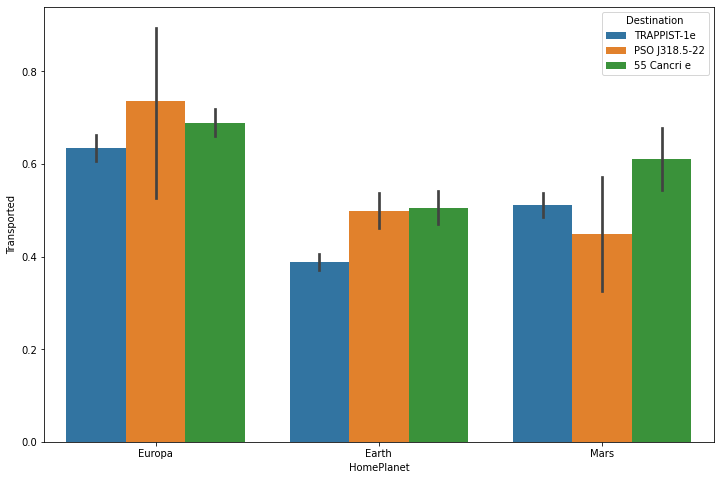

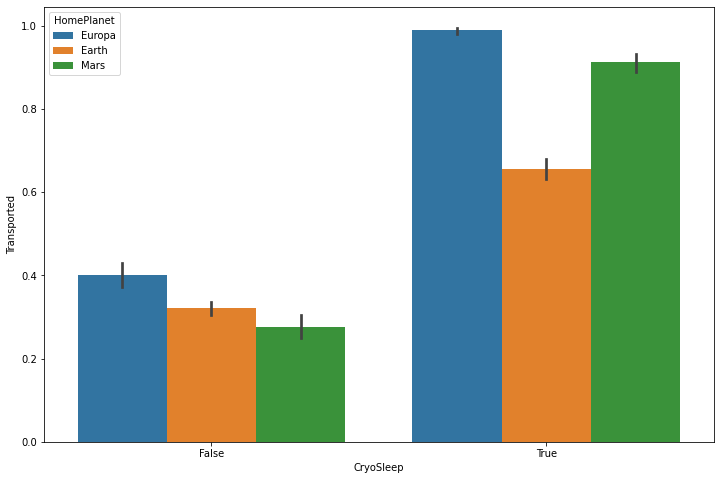

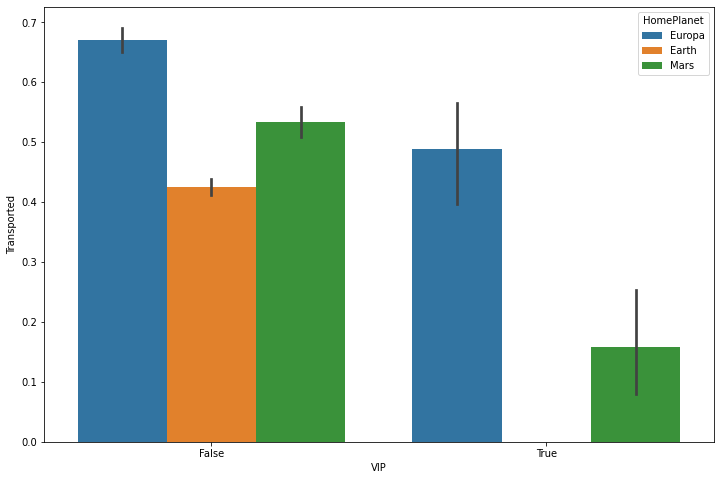

In [ ]:
#plotting data in the database of train.csv

plt.figure(figsize=(12,8))
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='HomePlanet',y='Transported',hue='Destination',data=train)

plt.figure(figsize=(12,8))
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='CryoSleep',y='Transported',hue='HomePlanet',data=train)

plt.figure(figsize=(12,8))
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='VIP',y='Transported',hue='HomePlanet',data=train)

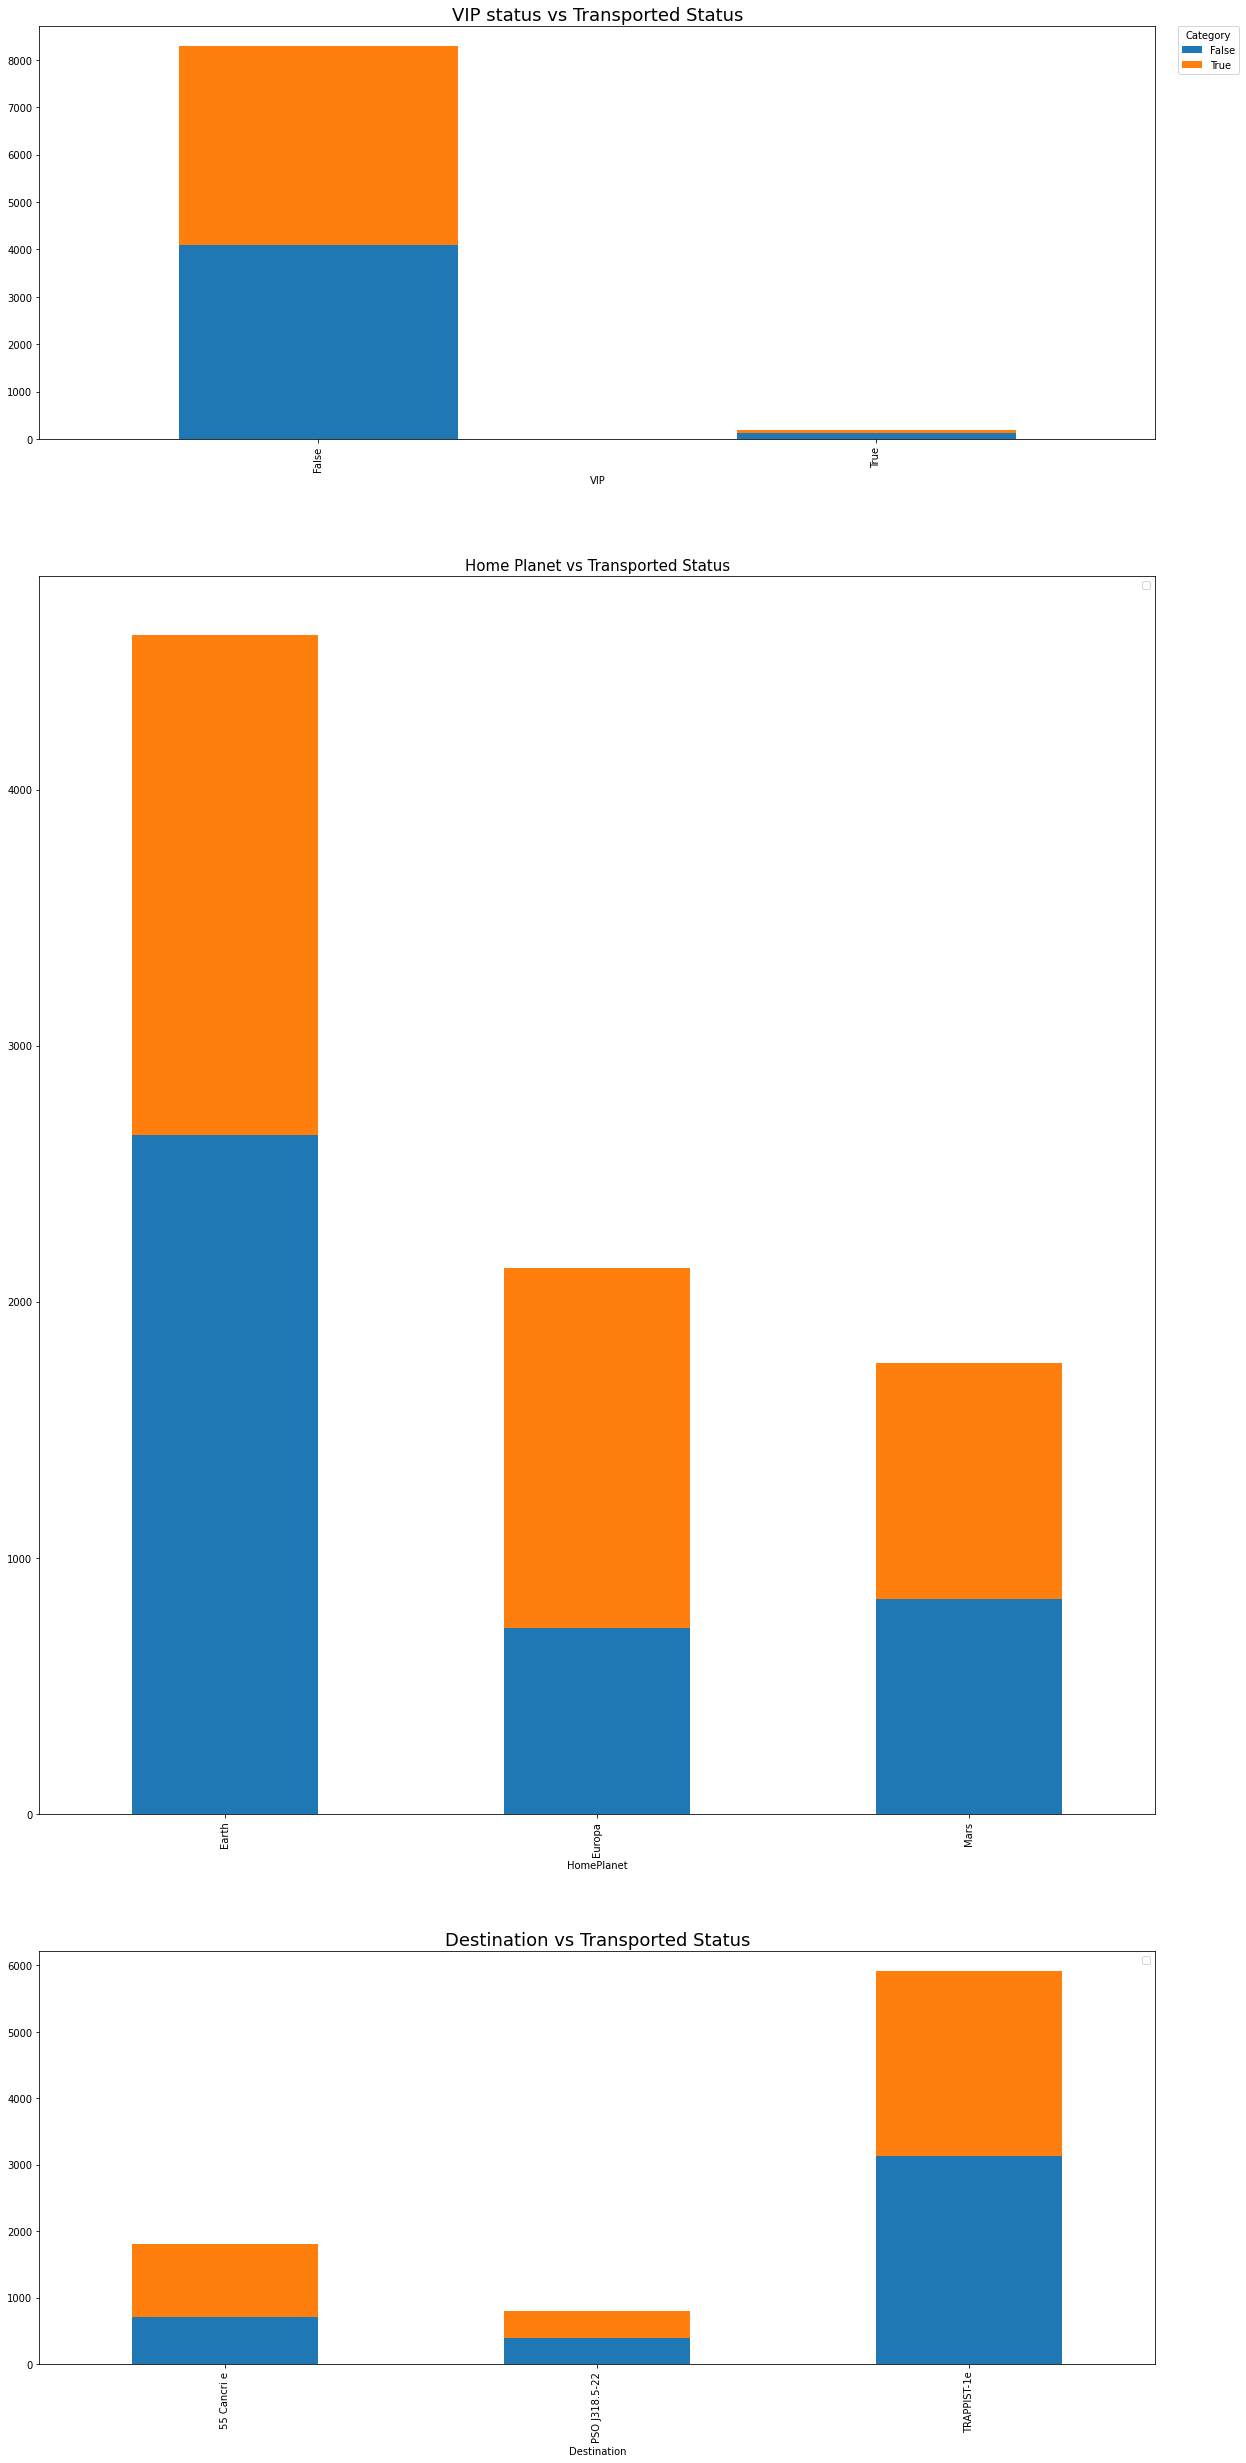

In [ ]:
fig, ax= plt.subplots(nrows=3, ncols=1, gridspec_kw = {'height_ratios':[1, 3, 1]})
fig.set_size_inches(20, 43)
tmp=pd.crosstab(train.VIP, train.Transported).plot.bar(stacked=True, ax=ax[0])
ax[0].legend(title='Category', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
ax[0].set_title("VIP status vs Transported Status", size=18)
tmp=pd.crosstab(train.HomePlanet, train.Transported).plot.bar(stacked=True, ax=ax[1])
ax[1].legend([])
ax[1].set_title("Home Planet vs Transported Status", size=15)

tmp=pd.crosstab(train.Destination, train.Transported).plot.bar(stacked=True, ax=ax[2])
ax[2].legend([])
ax[2].set_title("Destination vs Transported Status", size=18)
plt.show()

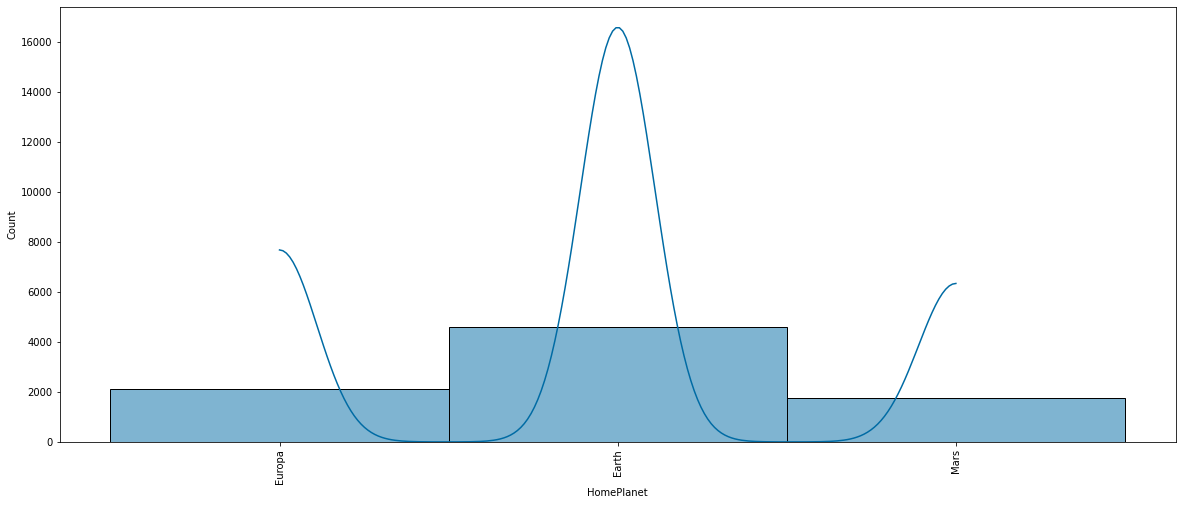

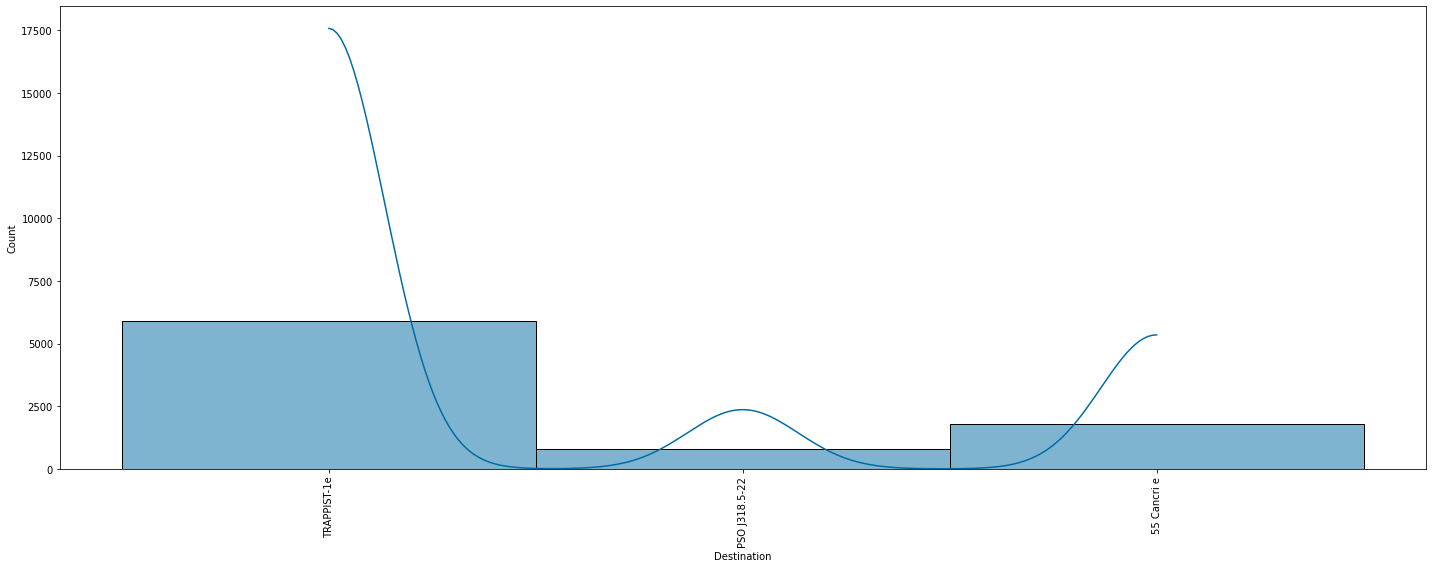

In [ ]:
def visualization(value, tight=False):
    with plt.style.context('tableau-colorblind10'):
        fig, ax = plt.subplots(1, 1, figsize=(20, 8))
        sns.histplot(x=value, data=train, kde=True, ax=ax)
        ax.tick_params(axis='x', rotation=90)
        if tight == True:
            fig.tight_layout()

visualization(train['HomePlanet'],tight = False)
visualization(train['Destination'],tight = True)

In [ ]:
#Checking that if data has missing values

print(train.isnull().sum())
print("The shape of train dataset is: ",train.shape)
#The result shows there are missing entries in the data

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
The shape of train dataset is:  (8693, 14)


In [ ]:
#storing the result in an array so that column can be dropped as result can't depend on this column
train_transported = train['Transported']

#storing train and test data together for to_preprocessing
to_preprocess = pd.concat((train, test)).reset_index(drop = True)

#dropping columns that don't affect result
to_preprocess.drop(['Transported'], axis = 1, inplace = True)
to_preprocess.drop(['PassengerId'], axis = 1, inplace = True)
to_preprocess.drop(['Name'], axis = 1, inplace = True) 

In [ ]:
to_preprocess.isnull().sum()

HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

In [ ]:
#classfying columns for the purpose of filling missing values

categorical_columns = to_preprocess.dtypes[to_preprocess.dtypes == "object"].index
numerical_columns = to_preprocess.dtypes[to_preprocess.dtypes != "object"].index

print(categorical_columns) 
print(numerical_columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [ ]:
#filling missing values using fillna()

for col in numerical_columns:
  to_preprocess[col].fillna(to_preprocess[col].median(),inplace=True)

for col in categorical_columns:
  to_preprocess[col].fillna(to_preprocess[col].mode().iloc[0],inplace=True)

In [ ]:
to_preprocess.isnull().sum()

#result shows there is no missing data now

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
#using lable encoding for categorical columns
for col in categorical_columns:
    label_encoder_obj = LabelEncoder() 
    label_encoder_obj.fit(list(to_preprocess[col].values)) 
    to_preprocess[col] = label_encoder_obj.transform(list(to_preprocess[col].values))


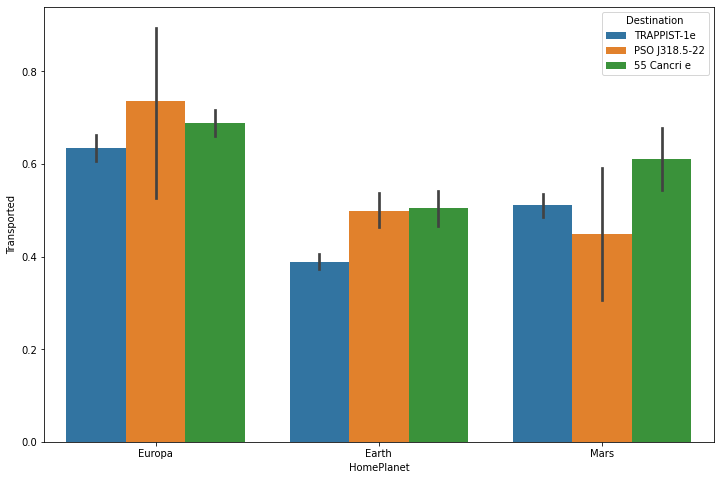

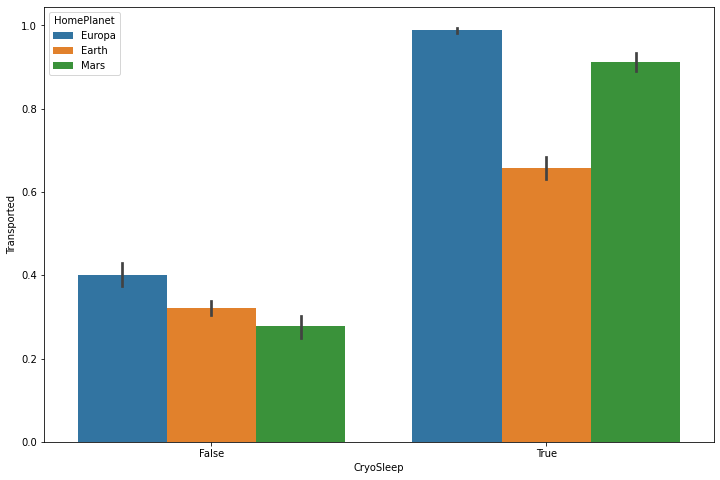

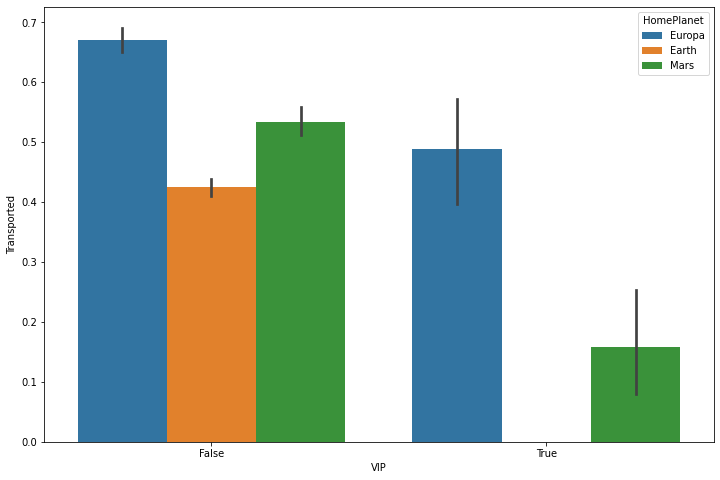

In [ ]:
#plots after preprocessing

plt.figure(figsize=(12,8))
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='HomePlanet',y='Transported',hue='Destination',data=train)

plt.figure(figsize=(12,8))
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='CryoSleep',y='Transported',hue='HomePlanet',data=train)

plt.figure(figsize=(12,8))
rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='VIP',y='Transported',hue='HomePlanet',data=train)

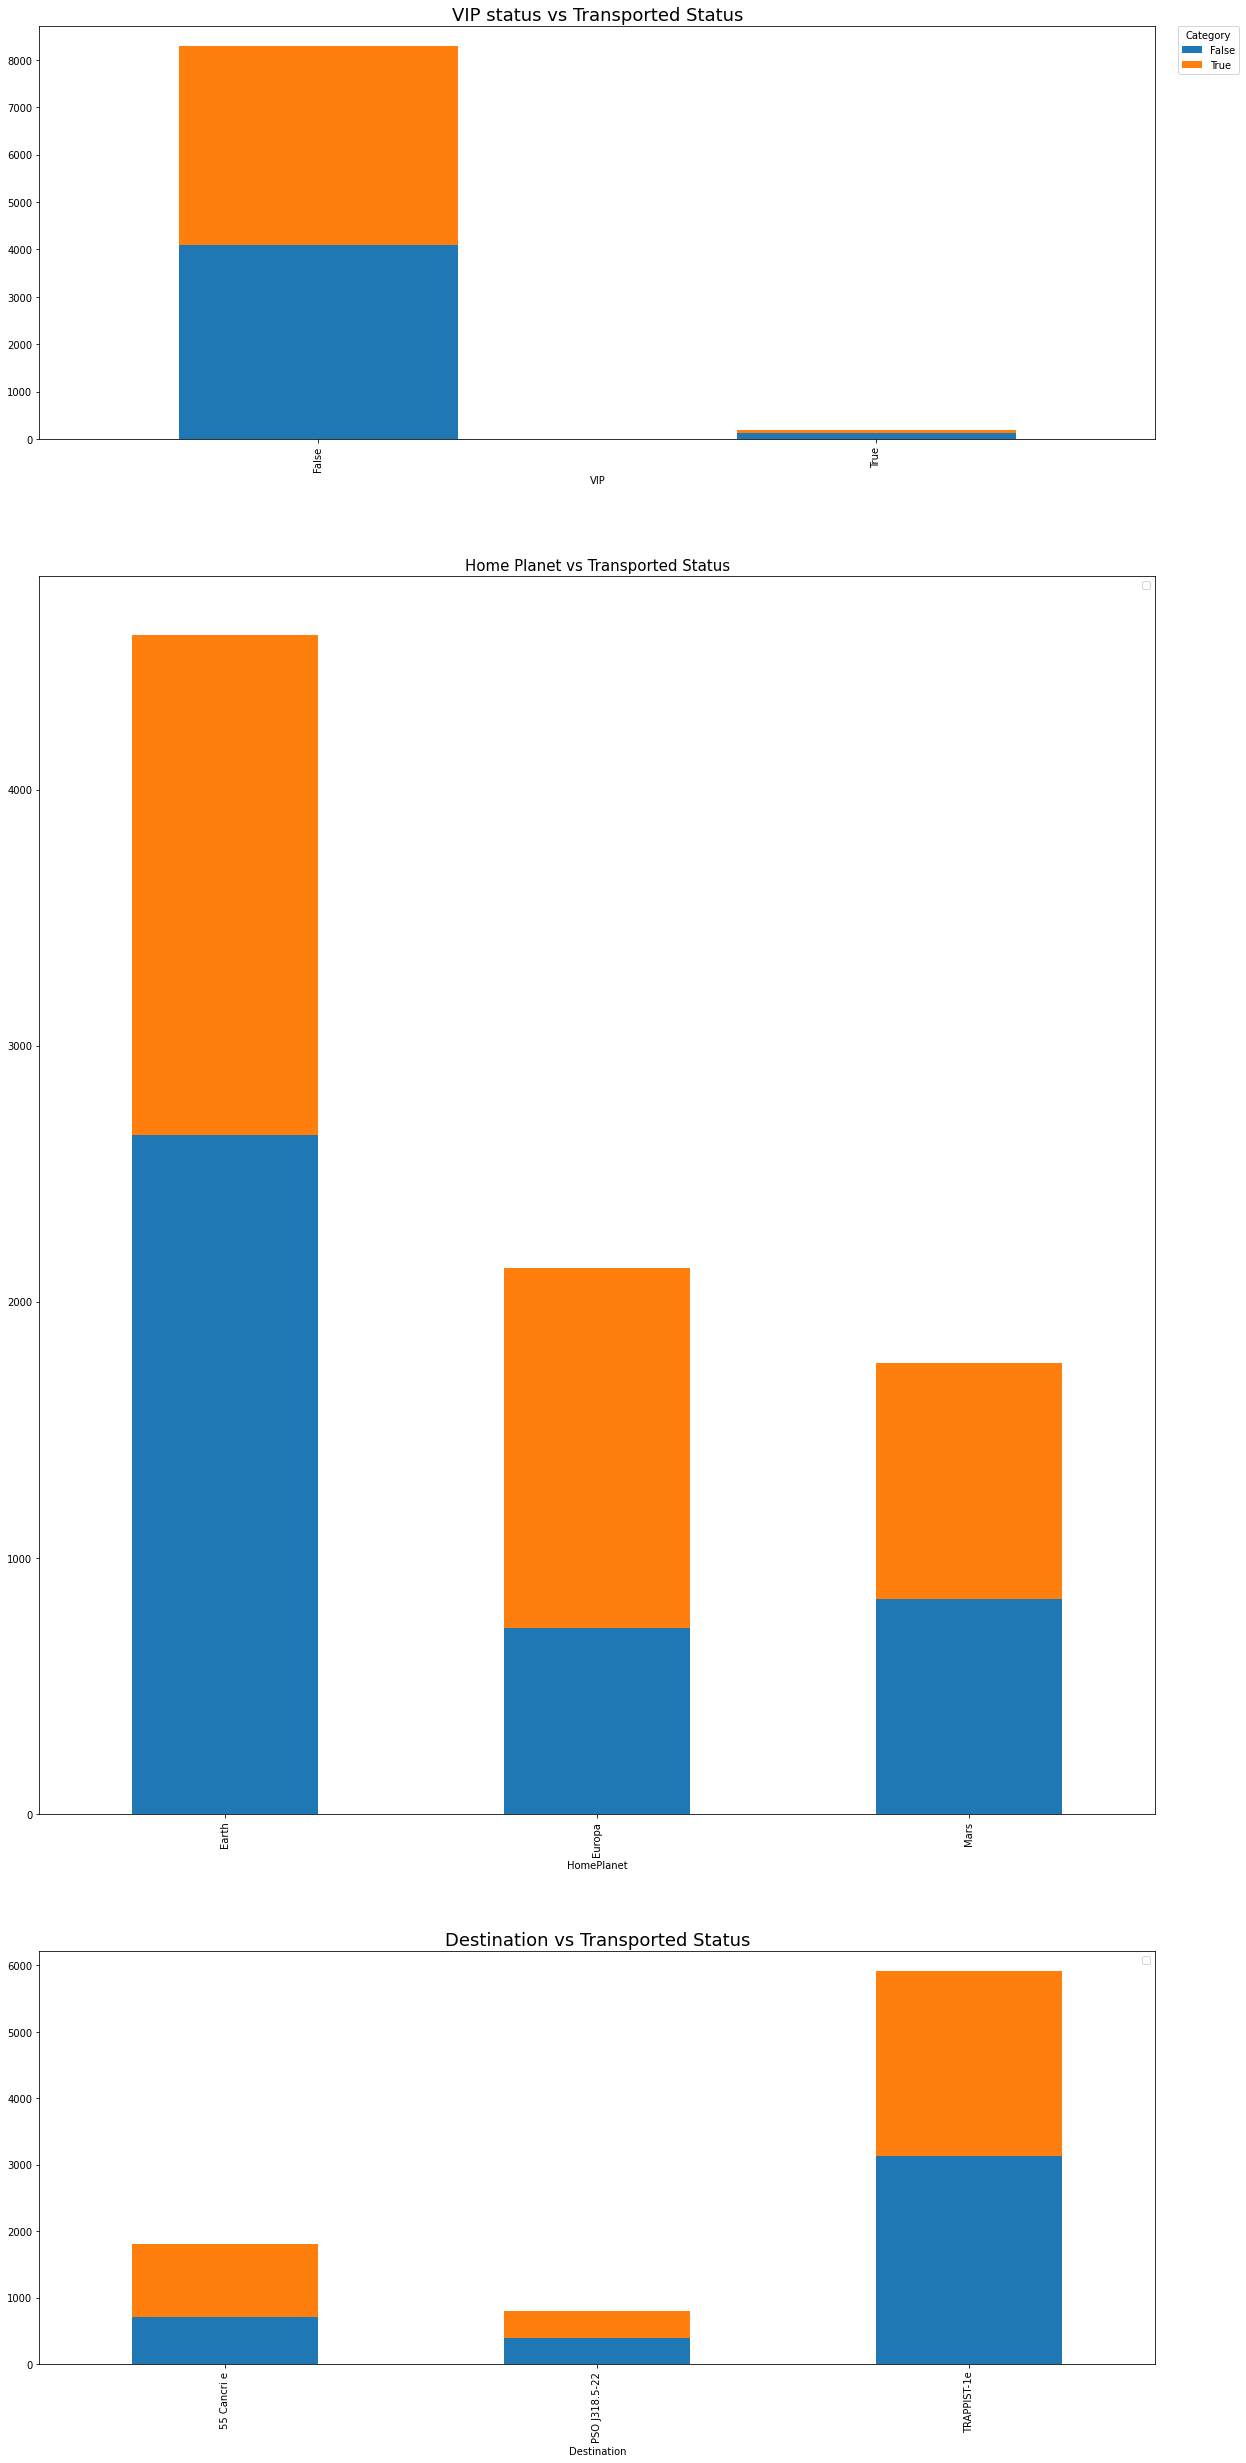

In [ ]:
fig, ax= plt.subplots(nrows=3, ncols=1, gridspec_kw = {'height_ratios':[1, 3, 1]})
fig.set_size_inches(20, 43)
tmp=pd.crosstab(train.VIP, train.Transported).plot.bar(stacked=True, ax=ax[0])
ax[0].legend(title='Category', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
ax[0].set_title("VIP status vs Transported Status", size=18)
tmp=pd.crosstab(train.HomePlanet, train.Transported).plot.bar(stacked=True, ax=ax[1])
ax[1].legend([])
ax[1].set_title("Home Planet vs Transported Status", size=15)

tmp=pd.crosstab(train.Destination, train.Transported).plot.bar(stacked=True, ax=ax[2])
ax[2].legend([])
ax[2].set_title("Destination vs Transported Status", size=18)
plt.show()

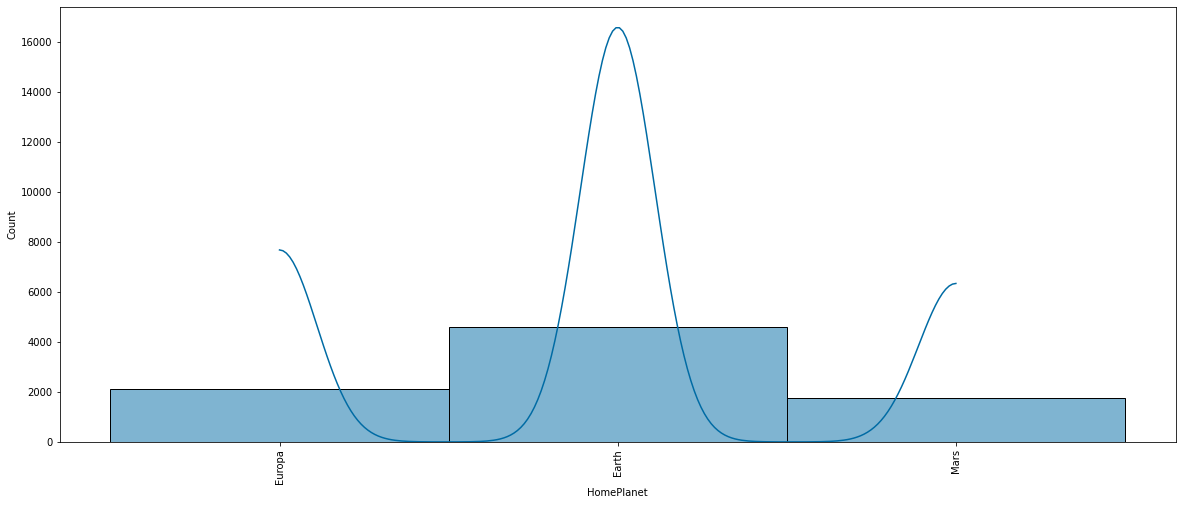

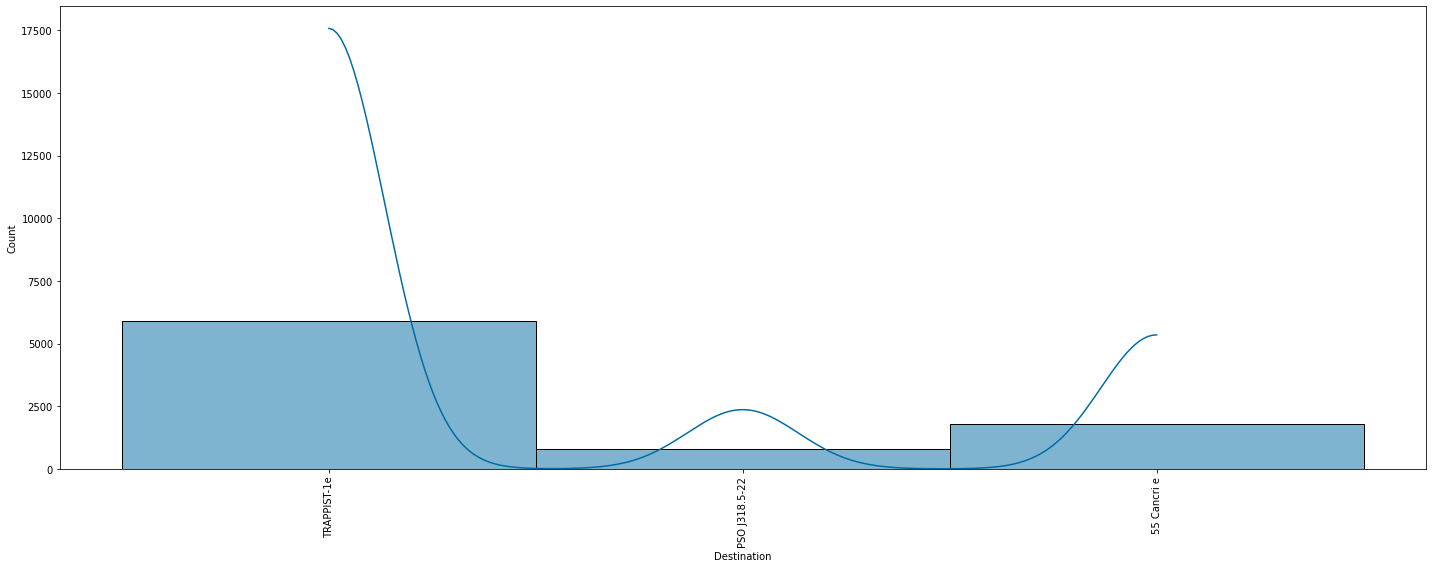

In [ ]:
visualization(train['HomePlanet'],tight = False)
visualization(train['Destination'],tight = True)

In [ ]:
#separating training and testing dataset after preprocessing

train_preprocessed = to_preprocess[0:8693]
test_preprocessed = to_preprocess[8693:]

In [ ]:
X = train_preprocessed
Y = train_transported
feature_columns = train_preprocessed.columns
Y = Y.replace({False: 0, True: 1})

# Splitting the train data to get training and validation set
train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size=0.30, random_state=40)

In [ ]:
classifier = LogisticRegression(random_state = 0, max_iter=10000)
classifier.fit(train_x, train_y)
y_pred = classifier.predict(val_x)

In [ ]:
Y = np.array(val_y)
#accuray score for validation set
print("The accuray on validation dataset is: ",accuracy_score(Y,y_pred)*100,"%")

The accuray on validation dataset is:  77.79907975460122 %


In [ ]:
model_predictions = classifier.predict(test_preprocessed[feature_columns])
results = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': model_predictions})
results.Transported = results.Transported.replace({0: False, 1: True})
results.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
results.to_csv('/content/gdrive/MyDrive/1_Subtask1/Submission.csv', index=False)